0 Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode=transmit)
1 Surface(profile=Spherical(c=0.00895223089593927), interact_mode=transmit)
2 Surface(profile=Spherical(c=0.0019454912268073127), interact_mode=transmit)
3 Surface(profile=Spherical(c=0.005211156042856548), interact_mode=transmit)
4 Surface(profile=Spherical(c=0.03305872552001375), interact_mode=transmit)
5 Surface(profile=Spherical(c=0.002358596257851177), interact_mode=transmit)
6 Surface(profile=Spherical(c=0.019676672910730872), interact_mode=transmit)
7 Surface(profile=Spherical(c=-0.02619234083569283), interact_mode=transmit)
8 Surface(profile=Spherical(c=0.005795623145400593), interact_mode=transmit)
9 Surface(profile=Spherical(c=-0.017760727479397557), interact_mode=transmit)
10 Surface(profile=Spherical(c=-0.000609132108571707), interact_mode=transmit)
11 Surface(profile=Spherical(c=-0.030579075961482596), interact_mode=transmit)
12 Surface(profile=Spherical(c=0.004050550874918989), interact_mode=transmit)


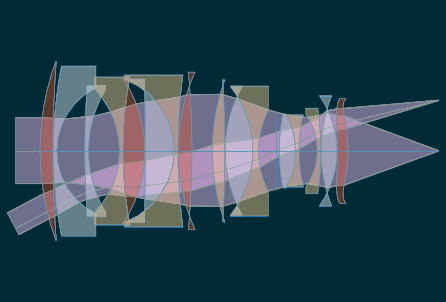

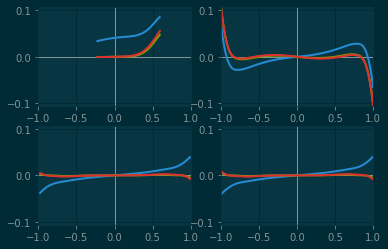

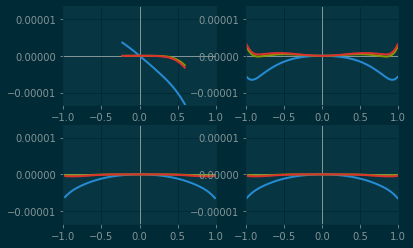

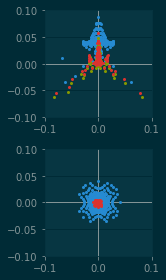

In [6]:
%matplotlib inline
isdark = True
from rayoptics.environment import *
from rayoptics.elem.elements import Element
from rayoptics.raytr.trace import apply_paraxial_vignetting

# JP2020-012952 Example 1
# Obtained via https://www.photonstophotos.net/GeneralTopics/Lenses/OpticalBench/OpticalBenchHub.htm

opm = OpticalModel()
sm  = opm.seq_model
osp = opm.optical_spec
pm = opm.parax_model
osp.pupil = PupilSpec(osp, key=['image', 'f/#'], value=1.45)
osp.field_of_view = FieldSpec(osp, key=['object', 'angle'], flds=[0., 27.935])
osp.spectral_region = WvlSpec([(486.1327, 0.5), (587.5618, 1.0), (656.2725, 0.5)], ref_wl=1)
opm.system_spec.title = 'JP2020-012952 Example 1'
opm.system_spec.dimensions = 'MM'
opm.radius_mode = True
sm.gaps[0].thi=1e10
sm.add_surface([111.704,5.5478,1.7725,49.62])
sm.ifcs[sm.cur_surface].max_aperture = 34.935
sm.add_surface([514.009,0.15])
sm.ifcs[sm.cur_surface].max_aperture = 34.935
sm.add_surface([191.896,1.5,1.437,95.1])
sm.ifcs[sm.cur_surface].max_aperture = 32.735
sm.add_surface([30.2492,12.0599])
sm.ifcs[sm.cur_surface].max_aperture = 24.5
sm.add_surface([423.981,1.5,1.437,95.1])
sm.ifcs[sm.cur_surface].max_aperture = 25.92
sm.add_surface([50.8216,13.2984])
sm.ifcs[sm.cur_surface].max_aperture = 22.95
sm.add_surface([-38.1791,1.5,1.64769,33.84])
sm.ifcs[sm.cur_surface].max_aperture = 22.95
sm.add_surface([172.544,9.3857,1.83481,42.72])
sm.ifcs[sm.cur_surface].max_aperture = 26.845
sm.add_surface([-56.304,0.15])
sm.ifcs[sm.cur_surface].max_aperture = 26.845
sm.add_surface([-1641.68,12.4672,1.55032,75.5])
sm.ifcs[sm.cur_surface].max_aperture = 25.795
sm.add_surface([-32.7021,1.5,1.60342,38.01])
sm.ifcs[sm.cur_surface].max_aperture = 25.795
sm.add_surface([246.88,0.15])
sm.ifcs[sm.cur_surface].max_aperture = 26.24
sm.add_surface([83.2754,5.882,1.7725,49.62])
sm.ifcs[sm.cur_surface].max_aperture = 25.535
sm.add_surface([-377.05,8.7665])
sm.ifcs[sm.cur_surface].max_aperture = 25.535
sm.add_surface([90.4416,5.3037,1.92286,20.88])
sm.ifcs[sm.cur_surface].max_aperture = 25.535
sm.add_surface([-527.489,0.15])
sm.ifcs[sm.cur_surface].max_aperture = 25.535
sm.add_surface([55.6364,11.866,1.59282,68.63])
sm.ifcs[sm.cur_surface].max_aperture = 23.445
sm.add_surface([-44.6058,2.482,1.58144,40.89])
sm.ifcs[sm.cur_surface].max_aperture = 23.445
sm.add_surface([39.3845,7.3907])
sm.ifcs[sm.cur_surface].max_aperture = 18.25
sm.add_surface([0,1.5])
sm.set_stop()
sm.ifcs[sm.cur_surface].max_aperture = 16.6065
sm.add_surface([84.0231,6.8887,1.437,95.1])
sm.ifcs[sm.cur_surface].max_aperture = 17.11
sm.add_surface([-32.202,1.5,1.64769,33.84])
sm.ifcs[sm.cur_surface].max_aperture = 17.11
sm.add_surface([66.2242,7.8613])
sm.ifcs[sm.cur_surface].max_aperture = 14.625
sm.add_surface([-26.9856,1.5,1.62588,35.74])
sm.ifcs[sm.cur_surface].max_aperture = 14.625
sm.add_surface([-121.029,0.15])
sm.ifcs[sm.cur_surface].max_aperture = 16.37
sm.add_surface([64.6922,6.7685,1.59282,68.63])
sm.ifcs[sm.cur_surface].max_aperture = 17.175
sm.add_surface([-40.8255,0.15])
sm.ifcs[sm.cur_surface].max_aperture = 17.175
sm.add_surface([-430.037,4.6315,1.85135,40.1])
sm.ifcs[sm.cur_surface].profile = EvenPolynomial(r=-430.037, cc=0,
        coefs=[0.0,-2.73662e-06,3.07519e-09,3.90515e-11,-1.94154e-14,0,0])
sm.ifcs[sm.cur_surface].max_aperture = 17.04
sm.add_surface([-54.9865,39.0002])
sm.ifcs[sm.cur_surface].profile = EvenPolynomial(r=-54.9865, cc=0,
        coefs=[0.0,3.26804e-06,3.98767e-09,3.58258e-11,0,0,0])
sm.ifcs[sm.cur_surface].max_aperture = 17.04
sm.list_surfaces()
sm.list_gaps()
opm.update_model()
apply_paraxial_vignetting(opm)
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm, do_draw_rays=True, do_paraxial_layout=False,
                        is_dark=isdark).plot()
sm.list_model()
# List the optical specifications
pm.first_order_data()
# List the paraxial model
pm.list_lens()
# Plot the transverse ray aberrations
abr_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm,
          data_type='Ray', scale_type=Fit.All_Same, is_dark=isdark).plot()
# Plot the wavefront aberration
wav_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm,
          data_type='OPD', scale_type=Fit.All_Same, is_dark=isdark).plot()
# Plot spot diagrams
spot_plt = plt.figure(FigureClass=SpotDiagramFigure, opt_model=opm,
                      scale_type=Fit.User_Scale, user_scale_value=0.1, is_dark=isdark).plot()